### 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### 2.Check the train data

In [2]:
dataset_train=pd.read_csv("../input/titanic/train.csv")
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
dataset_train.shape

(891, 12)

### 3.Data Pre-processing

In [5]:
df_train=dataset_train.fillna(method="ffill")#fill the null values

In [6]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        890 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#label Encoding
label_encoder=preprocessing.LabelEncoder()
df_train['gender_type']=label_encoder.fit_transform(df_train["Sex"])
df_train['embark_type']=label_encoder.fit_transform(df_train["Embarked"])


In [10]:
#delete the unrequired columns
del df_train['Sex']
del df_train['Embarked']
del df_train['Cabin']
del df_train['Ticket']
del df_train['Name']


In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender_type,embark_type
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   gender_type  891 non-null    int64  
 8   embark_type  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [13]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'gender_type', 'embark_type'],
      dtype='object')

In [14]:
#split the data into x and y
x=df_train[['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Fare','gender_type', 'embark_type']]
y=df_train[['Survived']]

In [15]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender_type,embark_type
0,1,3,22.0,1,0,7.2500,1,2
1,2,1,38.0,1,0,71.2833,0,0
2,3,3,26.0,0,0,7.9250,0,2
3,4,1,35.0,1,0,53.1000,0,2
4,5,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,2
887,888,1,19.0,0,0,30.0000,0,2
888,889,3,19.0,1,2,23.4500,0,2
889,890,1,26.0,0,0,30.0000,1,0


In [16]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### 4. Check the test data

In [17]:
dataset_test=pd.read_csv("../input/titanic/test.csv")
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
dataset_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
dataset_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
df_test=dataset_test.fillna(method="ffill")

In [21]:
label_encoder=preprocessing.LabelEncoder()
df_test['gender_type']=label_encoder.fit_transform(df_test["Sex"])
df_test['embark_type']=label_encoder.fit_transform(df_test["Embarked"])


In [22]:
del df_test['Sex']
del df_test['Embarked']
del df_test['Cabin']
del df_test['Ticket']
del df_test['Name']


In [23]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender_type,embark_type
0,892,3,34.5,0,0,7.8292,1,1
1,893,3,47.0,1,0,7.0000,0,2
2,894,2,62.0,0,0,9.6875,1,1
3,895,3,27.0,0,0,8.6625,1,2
4,896,3,22.0,1,1,12.2875,0,2


In [24]:
#train data send for the training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=20)


In [25]:
#scaled the x (train and test data)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled = scaler.fit_transform(df_train)


x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled=scaler.transform(x_test)
print("Mean value:",x_train_scaled.mean(axis=0))
print("SD value:",x_train_scaled.std(axis=0))

Mean value: [ 9.38144829e-17 -2.03944528e-16  6.52622490e-17 -1.63155622e-17
  5.91439131e-17 -3.26311245e-17 -2.85522339e-17  6.52622490e-17]
SD value: [1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
df_scaled = pd.DataFrame(scaled,columns=df_train.columns)
df_scaled.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender_type,embark_type
0,-1.730108,-0.789272,0.827377,-0.521198,0.432793,-0.473674,-0.502445,0.737695,0.589045
1,-1.726220,1.266990,-1.566107,0.578729,0.432793,-0.473674,0.786845,-1.355574,-1.934220
2,-1.722332,1.266990,0.827377,-0.246216,-0.474545,-0.473674,-0.488854,-1.355574,0.589045
3,-1.718444,1.266990,-1.566107,0.372493,0.432793,-0.473674,0.420730,-1.355574,0.589045
4,-1.714556,-0.789272,0.827377,0.372493,-0.474545,-0.473674,-0.486337,0.737695,0.589045


### 5.Model selection and implementation

In [27]:
from sklearn import tree

In [28]:
clf= tree.DecisionTreeClassifier()
clf= clf.fit(x_train_scaled,y_train)

In [29]:
clf.score(x_test_scaled,y_test)*100 #accuracy

75.0

In [30]:
predict= clf.predict(x_test)
print(predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
error = mean_absolute_error(predict,y_test)*100
error#error

45.0

### 6.EDA

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
cm

array([[11,  0],
       [ 9,  0]])

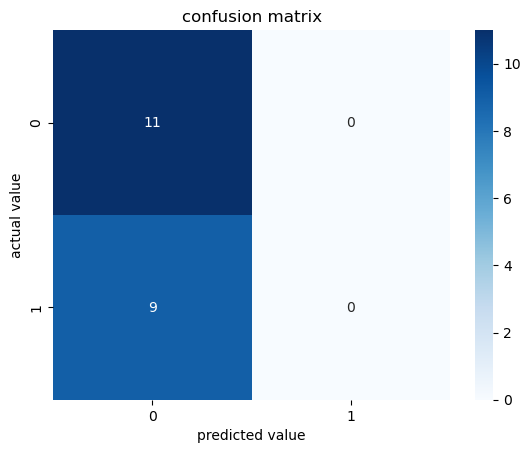

In [33]:
#visulization of confusion matrix
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_title("confusion matrix")
ax.set_xlabel("predicted value")
ax.set_ylabel("actual value")
plt.show()

In [34]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

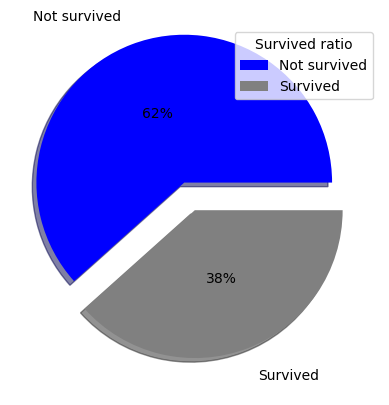

In [35]:
a = df_train['Survived'].value_counts()
labels = ['Not survived', 'Survived']
explode = [0.2,0] 
colors = ['blue', 'grey'] 
plt.pie(a, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2, explode=explode, colors=colors, shadow = True) 

plt.legend(title = "Survived ratio")
plt.show() 

In [36]:
fr=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
fr

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
Submission = clf.predict(df_test)
Submission

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
pd.DataFrame({
    "Survived" : Submission
},columns=["Survived"])

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,0
415,0
416,0


In [39]:
test1=pd.read_csv("/kaggle/input/titanic/test.csv")
test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
test2=test1["PassengerId"]
test2

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [41]:
fl = pd.DataFrame({
    "PassengerId":test2.values,
    "Survived" : Submission
},columns=["PassengerId","Survived"])
fl

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [42]:
fl.set_index("PassengerId", inplace=True)
fl.to_csv("Submission.csv")